CS4001/4042 Assignment 1, Part B, Q1
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra] -q

In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


> Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [10]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here
mask_train = (df['year']<=2019)
mask_val = (df['year']==2020)
mask_test = (df['year']==2021)
train = df.loc[mask_train]
val = df.loc[mask_val]
test = df.loc[mask_test]

> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [15]:
# TODO: Enter your code here

target = 'resale_price'
num_col_names = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']
cat_col_names = ['month', 'town', 'flat_model_type', 'storey_range']

data_config = DataConfig(
    target=[
        target
    ],  # target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=50,
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  # Number of nodes in each layer
    activation="ReLU",  # Activation between each layers
    learning_rate=1e-3,
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train, validation=val)
result = tabular_model.evaluate(test)
pred_df = tabular_model.predict(test)
tabular_model.save_model("models/partb1")
loaded_model = TabularModel.load_from_checkpoint("models/partb1")

2023-10-05 07:49:18,405 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-10-05 07:49:18,465 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-10-05 07:49:18,474 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
2023-10-05 07:49:18,668 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: CategoryEmbeddingModel
2023-10-05 07:49:18,797 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
/usr/local/lib/python3.10/dist-packages/pytorch_lightning

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.5754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/content/MyDrive/cz4042 neural networks/nn_assignment/.lr_find_fe8bce60-7b3c-4c82-a3c7-6b32282257a0.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/content/M

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-10-05 07:50:07,354 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-10-05 07:50:07,358 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(


Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       5882416128.0        │
│  test_mean_squared_error  │       5882416128.0        │
└───────────────────────────┴───────────────────────────┘

Output()

> Report the test RMSE error and the test R2 value that you obtained.



In [18]:
from sklearn.metrics import r2_score, mean_squared_error

y = pred_df['resale_price']
y_pred = pred_df['resale_price_prediction']

r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"R2: {r2}")
print(f"RMSE: {rmse}")

R2: 0.7776188068029297
RMSE: 76696.91659962252


\<R2: 0.7776188068029297
RMSE: 76696.91659962252\>

> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



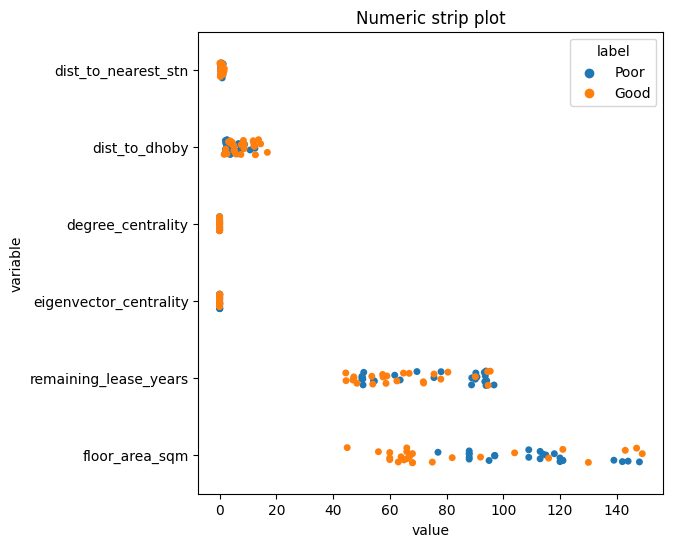

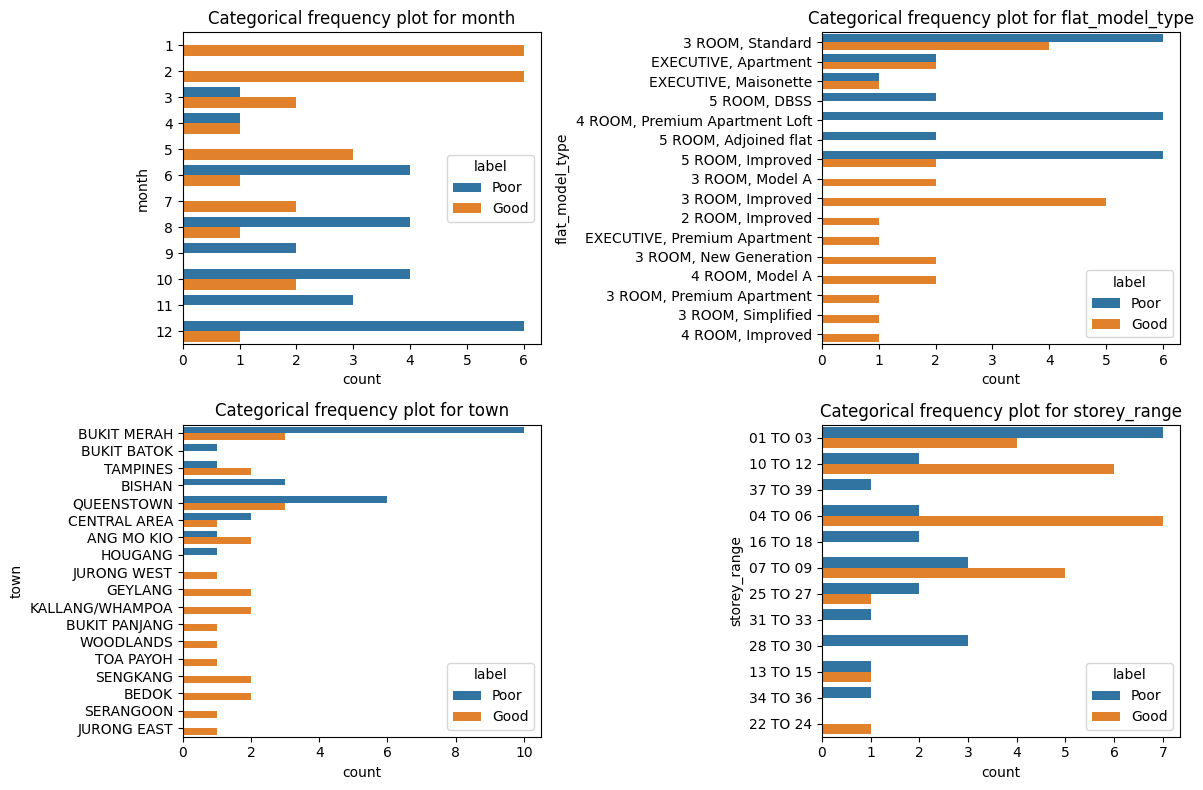

In [105]:
# TODO: Enter your code here
## differences in predictions likely due to differences in distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

pred_df['squared_error'] = pred_df.apply(lambda x: mean_squared_error([x['resale_price']], [x['resale_price_prediction']]), axis=1)
bad_preds = pred_df.sort_values(by='squared_error', ascending=False).head(25).reset_index(drop=True)
good_preds = pred_df.sort_values(by='squared_error', ascending=True).head(25).reset_index(drop=True) ## for comparison
bad_preds['label'] = "Poor"
good_preds['label'] = "Good"

## analyze numeric features
f = plt.figure(figsize=(6,6))
num_bad = bad_preds.loc[:,num_col_names+['label']]
num_good = good_preds.loc[:,num_col_names+['label']]
good_and_bad = pd.concat([num_bad, num_good], axis=0)
sns.stripplot(data = good_and_bad.melt(id_vars = 'label'), x = 'value', y='variable', hue='label')
plt.title("Numeric strip plot")

## analyze categorical features
f, ax = plt.subplots(2, 2, figsize=(12,8))
cat_bad = bad_preds.loc[:,cat_col_names+['label']]
cat_good = good_preds.loc[:,cat_col_names+['label']]
good_and_bad = pd.concat([cat_bad, cat_good], axis=0)

j=0
for i,v in enumerate(cat_col_names):
    if i%2==0:
        j+=1
    sns.countplot(data = good_and_bad, y=v, hue='label', ax = ax[i%2, j-1])
    ax[i%2, j-1].set_title(f"Categorical frequency plot for {v}")

plt.tight_layout()

\<From the plots, we can break down the analysis into numeric-focused and categorical-focused for both well-performing data points and poor-performing data points. A likely reason for difference in performance is due to differences in feature distribution.
For the numeric columns, the data distributions are pretty evenly spread apart for floor_area_sqm which could be a factor in the difference in prediction quality. A larger floor_area_sqm could result in poorer predictions as seen from the plot.
For the categorical columns, almost all columns display a diffrence in distribution. Most notably:
- The model performs more poorly in the second half of the year
- The model performs more poorly for Premium  5-room flats
- The model performs more poorly in Queenstown, Bishan and Bukit Merah\>